# Mousiki - Exploratory Data Analysis

This notebook performs exploratory data analysis on the Spotify Million Song Dataset.

## Objectives
1. Load and inspect the dataset
2. Analyze basic statistics
3. Explore artist and song distributions
4. Examine text/lyrics characteristics
5. Identify data quality issues

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time
import warnings

# Configure visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [4]:
# Define data path
DATA_PATH = Path("../data/raw/spotify_millsongdata.csv")

# Check if file exists
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Expected data file at {DATA_PATH.resolve()}")

# Load dataset with optimized settings
read_kwargs = {"encoding": "utf-8", "dtype": {"text": "string"}}
start = time.perf_counter()

try:
    df = pd.read_csv(DATA_PATH, **read_kwargs)
except ValueError:
    # Fallback if dtype specification fails
    read_kwargs.pop("dtype", None)
    df = pd.read_csv(DATA_PATH, **read_kwargs)

elapsed = time.perf_counter() - start

print(f"✓ Loaded {DATA_PATH.name} in {elapsed:.2f}s")
print(f"  → {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"  → Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✓ Loaded spotify_millsongdata.csv in 1.12s
  → 57,650 rows × 4 columns
  → Memory usage: 81.76 MB


In [6]:
# Display random sample
sample_size = min(len(df), 5)
print("Random Sample:")
print("=" * 100)
display(df.sample(sample_size, random_state=69) if sample_size else df)

Random Sample:


,artist,song,link,text
57190,Yes,Beyond And Before,/y/yes/beyond+before_20148477.html,"Sparkling trees of silver foam cast shadows in winter home, \r\nSwaying branches breaking sound..."
17085,Randy Travis,Take Another Swing At Me,/r/randy+travis/take+another+swing+at+me_20318036.html,I know I sent you packin' \r\nBut now I want you back again \r\nLivin' without you ain't no li...
16982,Randy Travis,Are You Washed In The Blood?,/r/randy+travis/are+you+washed+in+the+blood_20694956.html,Have you been to Jesus for the cleansing power? \r\nAre you washed in the blood of the Lamb? \...
15080,Oscar Hammerstein,Oh What A Beautiful Mornin',/o/oscar+hammerstein/oh+what+a+beautiful+mornin_20907436.html,There's a bright golden haze on the meadow \r\nThere's a bright golden haze on the meadow \r\n...
50307,Ray Charles,"Gee, Baby Ain't I Good To You",/r/ray+charles/gee+baby+aint+i+good+to+you_20203248.html,"Love makes me treat you the way that I do \r\nBaby, ain't I good to you \r\nNothing in this wo..."


In [8]:
# Dataset info
print("Dataset Information:")
print("=" * 100)
df.info()

print("\n" + "=" * 100)
print("Column Names:", df.columns.tolist())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  string
dtypes: object(3), string(1)
memory usage: 1.8+ MB

Column Names: ['artist', 'song', 'link', 'text']


In [9]:
# Display first few rows
print("First 10 rows:")
print("=" * 100)
display(df.head(10))

First 10 rows:


,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nAnd it means something special to me \r\nLook at t..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gently like a summer evening breeze \r\nTake your ti..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,"I'll never know why I had to go \r\nWhy I had to put up such a lousy rotten show \r\nBoy, I wa..."
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give and take \r\nYou can learn how to show it so come o...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give and take \r\nYou can learn how to show it so come o...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me mad \r\nAnd I've always been under your heel \r\..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and shouting \r\nStaying alive though the city is dead ...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \r\nYou're enchained by your own sorrow \r\nIn your eyes ther..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,"I was out with the morning sun \r\nCouldn't sleep, so I thought I'd take a walk \r\nI was thin..."
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \r\nI'm sitting all alone \r\nI feel so cold without you \r\nIt chil...


In [10]:
# Missing values analysis
print("Missing Values Analysis:")
print("=" * 100)

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing %': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("✓ No missing values found!")

# Duplicate analysis
duplicates = df.duplicated().sum()
print(f"\n{'=' * 100}")
print(f"Duplicate Rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

Missing Values Analysis:
✓ No missing values found!

Duplicate Rows: 0 (0.00%)

Duplicate Rows: 0 (0.00%)


In [12]:
# Unique artists
unique_artists = df['artist'].nunique()
total_songs = len(df)

print(f"Artist Statistics:")
print("=" * 100)
print(f"Total Unique Artists: {unique_artists:,}")
print(f"Average Songs per Artist: {total_songs / unique_artists:.2f}")

# Top artists by song count
print(f"\n{'=' * 100}")
print("Top 20 Artists by Song Count:")
top_artists = df['artist'].value_counts().head(20)
display(pd.DataFrame({
    'Artist': top_artists.index,
    'Song Count': top_artists.values,
}).reset_index(drop=True))

Artist Statistics:
Total Unique Artists: 643
Average Songs per Artist: 89.66

Top 20 Artists by Song Count:


,Artist,Song Count
0,Donna Summer,191
1,Gordon Lightfoot,189
2,Bob Dylan,188
3,George Strait,188
4,Loretta Lynn,187
5,Alabama,187
6,Cher,187
7,Reba Mcentire,187
8,Chaka Khan,186
9,Dean Martin,186


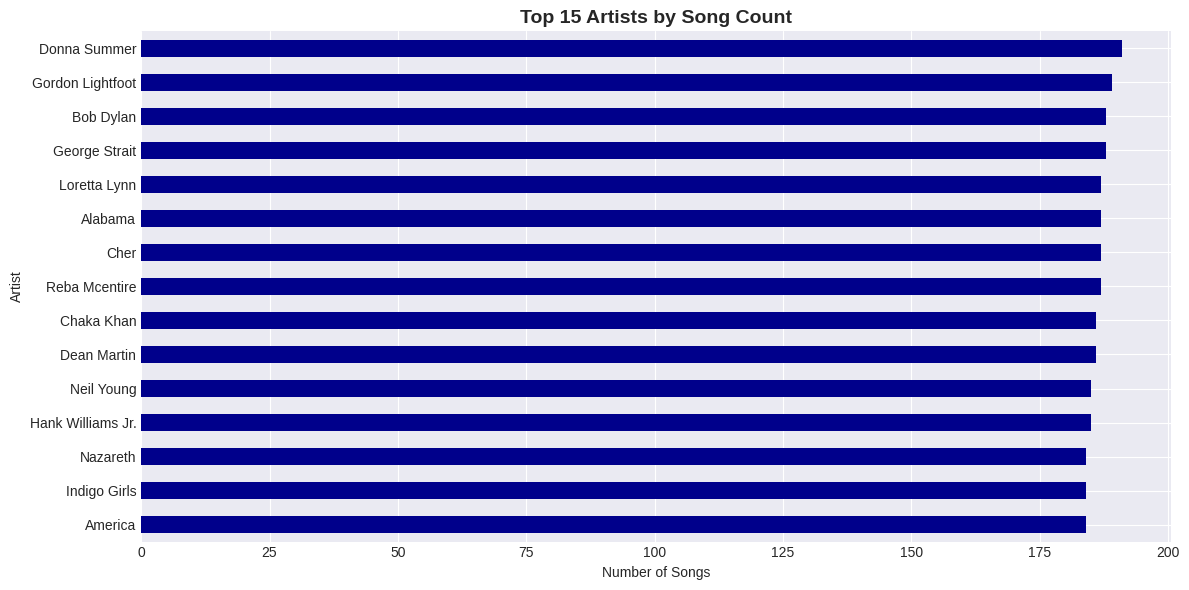

In [15]:
# Visualize top artists
fig, ax = plt.subplots(figsize=(12, 6))
top_artists.head(15).plot(kind='barh', ax=ax, color='darkblue')
ax.set_xlabel('Number of Songs')
ax.set_ylabel('Artist')
ax.set_title('Top 15 Artists by Song Count', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [18]:
# Unique songs
unique_songs = df['song'].nunique()

print(f"Song Statistics:")
print("=" * 100)
print(f"Total Unique Titled Songs: {unique_songs:,}")
print(f"Unique Titled Songs %: {unique_songs / total_songs * 100:.2f}%")

# Check for duplicate song titles
duplicate_songs = df[df.duplicated(subset=['song'], keep=False)].sort_values('song')
print(f"\nDuplicate Titled Songs: {len(duplicate_songs):,}")

if len(duplicate_songs) > 0:
    print("\nSample Duplicate Titled Songs(Same title, Different artists):")
    display(duplicate_songs.head(10)[['artist', 'song']])

Song Statistics:
Total Unique Titled Songs: 44,824
Unique Titled Songs %: 77.75%

Duplicate Titled Songs: 18,960

Sample Duplicate Titled Songs(Same title, Different artists):


,artist,song
50299,Ray Charles,'Deed I Do
30995,Ella Fitzgerald,'Deed I Do
10249,Kelly Clarkson,(Love Will) Turn Back The Hands Of Time
7197,Grease,(Love Will) Turn Back The Hands Of Time
4722,Electric Light Orchestra,10538 Overture
29300,Def Leppard,10538 Overture
41303,Leann Rimes,16 Tons
17710,Robbie Williams,16 Tons
13138,Misfits,1969
8154,Iggy Pop,1969


In [19]:
# Text/lyrics statistics
if 'text' in df.columns:
    # Calculate text lengths
    df['text_length'] = df['text'].fillna('').astype(str).str.len()
    df['word_count'] = df['text'].fillna('').astype(str).str.split().str.len()
    
    print("Lyrics Statistics:")
    print("=" * 100)
    print(f"Songs with lyrics: {df['text'].notna().sum():,} ({df['text'].notna().sum()/len(df)*100:.2f}%)")
    print(f"Songs without lyrics: {df['text'].isna().sum():,} ({df['text'].isna().sum()/len(df)*100:.2f}%)")
    
    print(f"\n{'=' * 100}")
    print("Text Length Statistics:")
    print(df['text_length'].describe())
    
    print(f"\n{'=' * 100}")
    print("Word Count Statistics:")
    print(df['word_count'].describe())

Lyrics Statistics:
Songs with lyrics: 57,650 (100.00%)
Songs without lyrics: 0 (0.00%)

Text Length Statistics:
count    57650.000000
mean      1220.616184
std        592.432453
min        410.000000
25%        813.000000
50%       1090.000000
75%       1463.750000
max       4186.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    57650.000000
mean       219.486262
std        108.814619
min         37.000000
25%        145.000000
50%        196.000000
75%        264.000000
max        827.000000
Name: word_count, dtype: float64
Songs with lyrics: 57,650 (100.00%)
Songs without lyrics: 0 (0.00%)

Text Length Statistics:
count    57650.000000
mean      1220.616184
std        592.432453
min        410.000000
25%        813.000000
50%       1090.000000
75%       1463.750000
max       4186.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    57650.000000
mean       219.486262
std        108.814619
min         37.000000
25%        145.000000
50%     

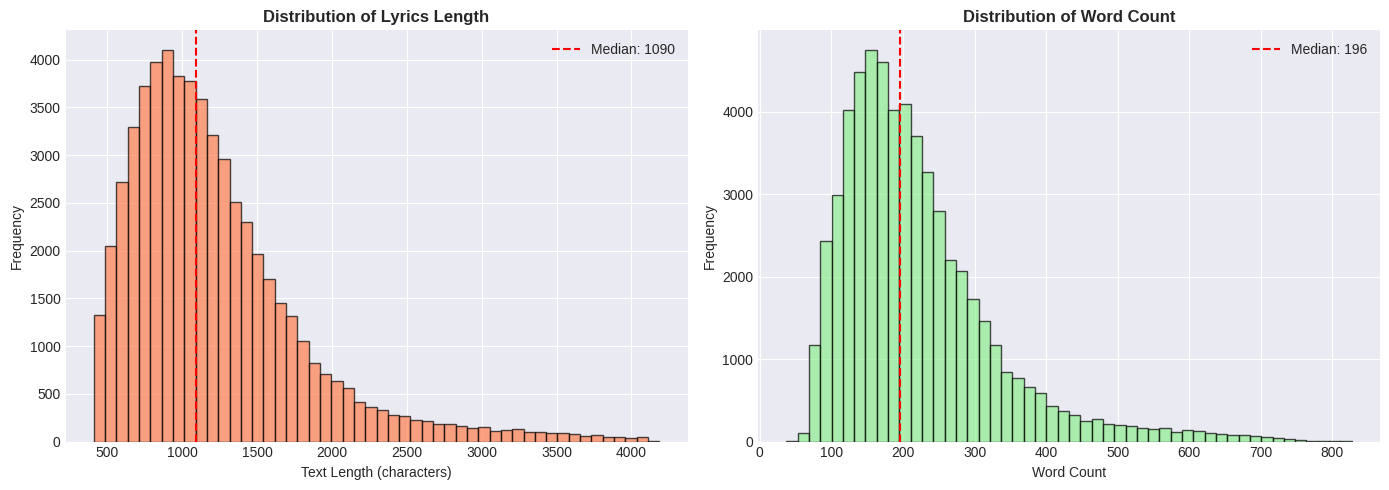

In [20]:
# Visualize text length distribution
if 'text_length' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Text length distribution
    axes[0].hist(df['text_length'], bins=50, color='coral', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Text Length (characters)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution of Lyrics Length', fontweight='bold')
    axes[0].axvline(df['text_length'].median(), color='red', linestyle='--', label=f"Median: {df['text_length'].median():.0f}")
    axes[0].legend()
    
    # Word count distribution
    axes[1].hist(df['word_count'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Word Count')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Distribution of Word Count', fontweight='bold')
    axes[1].axvline(df['word_count'].median(), color='red', linestyle='--', label=f"Median: {df['word_count'].median():.0f}")
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

In [23]:
# Final summary
print("=" * 100)
print("DATASET SUMMARY")
print("=" * 100)
print(f"Total Records: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print(f"Unique Artists: {df['artist'].nunique():,}")
print(f"Unique Songs: {df['song'].nunique():,}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Duplicates: {df.duplicated().sum():,}")
print(f"Missing Values: {df.isnull().sum().sum():,}")

if 'text_length' in df.columns:
    print(f"\nAverage Lyrics Length: {df['text_length'].mean():.0f} characters")
    print(f"Average Word Count: {df['word_count'].mean():.0f} words")
    print(f"Songs with Lyrics: {df['text'].notna().sum():,} ({df['text'].notna().sum()/len(df)*100:.2f}%)")

print("=" * 100)

DATASET SUMMARY
Total Records: 57,650
Total Columns: 6
Unique Artists: 643
Unique Songs: 44,824
Memory Usage: 82.64 MB
Duplicates: 0
Missing Values: 0

Average Lyrics Length: 1221 characters
Average Word Count: 219 words
Songs with Lyrics: 57,650 (100.00%)
Duplicates: 0
Missing Values: 0

Average Lyrics Length: 1221 characters
Average Word Count: 219 words
Songs with Lyrics: 57,650 (100.00%)


# Preprocessed Data

In [24]:
pp_dt = pd.read_csv("../data/processed/spotify_millsongdata_preprocessed.csv")

In [25]:
pp_dt.head()

,artist,song,link,text,title,title_clean,artist_clean,text_clean,combined_features
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nAnd it means something special to me \r\nLook at t...",Ahe's My Kind Of Girl,ahe s my kind of girl,abba,look at her face it s a wonderful face and it means something special to me look at the way that...,title: ahe s my kind of girl | artist: abba
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gently like a summer evening breeze \r\nTake your ti...","Andante, Andante",andante andante,abba,take it easy with me please touch me gently like a summer evening breeze take your time make it ...,title: andante andante | artist: abba
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,"I'll never know why I had to go \r\nWhy I had to put up such a lousy rotten show \r\nBoy, I wa...",As Good As New,as good as new,abba,i ll never know why i had to go why i had to put up such a lousy rotten show boy i was tough pac...,title: as good as new | artist: abba
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give and take \r\nYou can learn how to show it so come o...,Bang,bang,abba,making somebody happy is a question of give and take you can learn how to show it so come on giv...,title: bang | artist: abba
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give and take \r\nYou can learn how to show it so come o...,Bang-A-Boomerang,bang-a-boomerang,abba,making somebody happy is a question of give and take you can learn how to show it so come on giv...,title: bang-a-boomerang | artist: abba
